# 셀프주유소는 정말 저렴할까?

In [95]:
# 1.오피넷에서 서울시의 구별 주유소 가격정보 받기.
# 2.셀프 주유소와 일반 주유소의 가격 비교해보기.
# 3.싼 주유소 지도위에 표시하기.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import pandas as pd

### 1.서울시 구별 주유소 가격 정보 얻기

In [3]:
url = 'https://www.opinet.co.kr/user/main/mainView.do'
driver = webdriver.Chrome()
driver.get(url)

- 싼주유소 찾기 화면으로 넘어가기

In [100]:
driver.find_element_by_css_selector('.ic_m1').click()

- 서울에서 자치구 리스트 찾아오기

In [ ]:
#광역시도 copy>Xpath해서 가져오기
metro = driver.find_element_by_xpath('//*[@id="SIDO_NM0"]')
metro.send_keys('서울')
time.sleep(3)

In [ ]:
#구 copy>Xpath해서 가져오기
sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = sigungu.find_elements_by_css_selector('option')
gu_names = [gu.text for gu in gu_list]
del gu_names[0] #앞에붙은 시/군/구 제거

In [ ]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()

In [ ]:
#25개 자치구에 대해서 주유소 정보 액셀로 저장(버튼 클릭하게해서!!)
for gu in gu_names:
    sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
    sigungu.send_keys(gu)
    time.sleep(2)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()
    time.sleep(3)

In [ ]:
driver.close()

### 2.구별 휘발유 가격에 대한 데이터 정리

In [101]:
import pandas as pd
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [102]:
#여러개의 파일을 반복문을 써서 불러올수 잇게 해줌
glob('C:/Users/Owner/Downloads/지역*.xls')

['C:/Users/Owner/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(주유소) (4).xls',
 'C:/Users/Owner/Downloads\\지역_위치별(

In [103]:
file = glob('C:/Users/Owner/Downloads/지역*.xls')[0]
df = pd.read_excel(file, header=2) #엑셀에서는 skiprow 대신 header를 쓴다
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1969,1899,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1983,1927,-
2,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,2145,1995,1920,1460
3,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,2015,1950,-
4,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,2214,2025,1969,1650


In [104]:
#25개 파일을 읽어서 하나의 데이터 프레임으로 만들기
df_list = []
for file in glob('C:/Users/Owner/Downloads/지역*.xls'):
    gs = pd.read_excel(file, header=2)
    df_list.append(gs)

df = pd.concat(df_list)
df.shape

(464, 10)

- 필요한 정보만 가져오기

In [105]:
df = df[['상호','주소','휘발유','셀프여부','상표']]
df.tail()

,상호,주소,휘발유,셀프여부,상표
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2455,N,GS칼텍스
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2548,N,GS칼텍스
33,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지
34,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지
35,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL


In [106]:
df.rename(columns={'휘발유':'가격','셀프여부':'셀프'}, inplace=True)
df.tail()

,상호,주소,가격,셀프,상표
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2455,N,GS칼텍스
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2548,N,GS칼텍스
33,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지
34,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지
35,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL


In [107]:
df['구'] = df.주소.str.split().str[1]
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1969,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1983,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1995,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2015,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2025,N,GS칼텍스,강동구


In [108]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 35
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      464 non-null    object
 1   주소      464 non-null    object
 2   가격      464 non-null    object
 3   셀프      464 non-null    object
 4   상표      464 non-null    object
 5   구       464 non-null    object
dtypes: object(6)
memory usage: 25.4+ KB


In [110]:
#가격이 '-'인 부분은 삭제 및 정수로 변환
df = df[df.가격 != '-']
df.가격 = df.가격.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 32
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      456 non-null    object
 1   주소      456 non-null    object
 2   가격      456 non-null    int32 
 3   셀프      456 non-null    object
 4   상표      456 non-null    object
 5   구       456 non-null    object
dtypes: int32(1), object(5)
memory usage: 23.2+ KB


In [111]:
df.to_csv('서울_주유(220418).csv',index=False)

## 3.셀프 주유소가 정말 저렴한지 확인

In [112]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [113]:
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.family'] = 'Malgun Gothic'

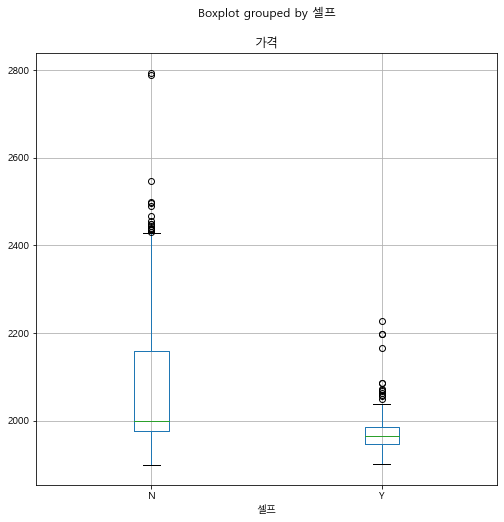

In [114]:
df.boxplot(column='가격', by='셀프', figsize=(8,8))
plt.show()

In [115]:
df[df.셀프 =='Y'].가격.mean()

1973.4

In [116]:
df[df.셀프=='N'].가격.mean()

2090.8552036199094

In [117]:
df[df.셀프 =='Y'].count()

상호    235
주소    235
가격    235
셀프    235
상표    235
구     235
dtype: int64

In [ ]:
#가설검정
# 귀무가설 : 셀프와 일반주유소의 가격차이가 없다.
# 대립가설 : 셀피가 일반주유소보다 가격이 싸다.

#2-sample T 검정(test)
#1. 정규성 통과
#2. T test
#3. p-value
    #p <0.05 - 귀무가설 기각, 대립가설 채택
    #p >0.05 - 귀무가설 채택

- 사이파이를 이용한 가설 검정.
        - 2-sample T 검정(독립표본)

In [118]:
import scipy as sp
sp.stats.ttest_ind(df[df.셀프 =='Y'].가격, df[df.셀프=='N'].가격, equal_var=False)

Ttest_indResult(statistic=-9.692657420833939, pvalue=5.098148364056279e-19)

- p-value가 0.05보다 작으므로 귀무가설 기각, 즉 대립가설 채택
    - H0(귀무가설) : 셀프주유소와 일반주유소의 가격 차이가 없다.
    - H1(대립가설) : 셀프주유소의 가격이 일반 주유소의 가격보다 저렴하다.

- 상표별 가격 비교

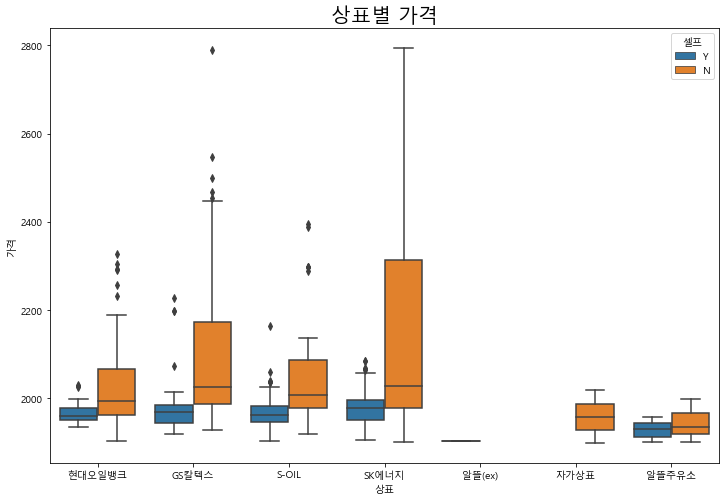

In [119]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=df)
plt.title('상표별 가격',fontsize=20)
plt.show()

## 4.구별 휘발유 가격비교

In [120]:
import json, folium

In [121]:
#서울시내 가격이 착한 주유소 top 5
df.sort_values(by='가격').head()

,상호,주소,가격,셀프,상표,구
0,정호주유소,서울 성동구 고산자로 307 (마장동),1898,N,자가상표,성동구
1,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1902,N,알뜰주유소,강서구
0,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1902,N,SK에너지,양천구
0,화곡역주유소,서울 강서구 강서로 154 (화곡동),1902,Y,알뜰주유소,강서구
2,형산석유(주)원주유소,서울 양천구 남부순환로 408,1904,N,현대오일뱅크,양천구


In [122]:
#가격이 비싼 주유소 top 5
df.sort_values(by='가격', ascending=False).head()

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2794,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2789,N,GS칼텍스,용산구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2548,N,GS칼텍스,강남구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2499,N,GS칼텍스,중구
31,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2497,N,SK에너지,서초구


In [154]:
#구별 비교
df.groupby('구')['가격'].agg(['mean','min','max']).sort_values(by='mean',ascending=False)


,mean,min,max
구,,,
용산구,2384.076923,2232,2789
중구,2288.100000,1959,2794
종로구,2243.500000,2049,2438
강남구,2131.848485,1977,2548
강동구,2072.928571,1969,2298
성동구,2070.470588,1898,2328
서초구,2047.968750,1904,2497
영등포구,2035.461538,1946,2428
구로구,2030.571429,1919,2448


## 5.단계구분도로 표시

In [ ]:
gu_data = df.groupby('구')[['가격']].mean()
gu_data.head()

,가격
구,
강남구,2131.848485
강동구,2072.928571
강북구,1960.461538
강서구,1984.156250
관악구,2004.214286


In [ ]:
filename = '../04.지도시각화/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(filename,encoding='utf-8'))

In [ ]:
import numpy as np

def get_text_location(geo_str):
    gu_dict = {}
    for gu in geo_str['features']:
        for coord in gu['geometry']['coordinates']:
            geo = np.array(coord)
            gu_dict[gu['id']] = [np.mean(geo[:,1]), np.mean(geo[:,0])]
    return gu_dict

In [ ]:
from folium.features import DivIcon

gu_dict = get_text_location(geo_str)

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data.가격,
    columns=[gu_data.index,gu_data.가격],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">구별 주유소 가격</h3>'    
map.get_root().html.add_child(folium.Element(title_html)) 
map

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data.가격,
    columns=[df.index, gu_data.가격],
    fill_color='YlGnBu',
    key_on='feature.id'
).add_to(map)
for gu_name in gu_data.index:
    folium.Marker(
        location=gu_dict[gu_name],
        icon=DivIcon(icon_size=(80,20), icon_anchor=(20,0),
            html=f'<div style="font-size: 10pt">{gu_name}</div>'
        )
    ).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">구별 주유소 가격</h3>'    
map.get_root().html.add_child(folium.Element(title_html)) 
map

## [과제]구별로 가장 비싼, 가장 저렴한 주유소 각 1곳을 표시하기

In [130]:
import requests
from urllib.parse import quote
import numpy as np
import pandas as pd

In [131]:
with open('../04.지도시각화/kakaoapikey.txt') as file:
    kakao_key = file.read()

len(kakao_key)

32

In [134]:
#서울시 오일리스트 읽어오기
gu_oil =pd.read_csv('서울_주유(220418).csv') 
gu_oil.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1969,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1983,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1995,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2015,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2025,N,GS칼텍스,강동구


In [219]:
#오류나는 주소 삭제
gu = gu_oil[~gu_oil['주소'].str.contains('대흥로 61')]

In [220]:
#구별 제일 비싼곳 리스트
df1 = gu.groupby('구').max()
df1.head(3)

,상호,주소,가격,셀프,상표
구,,,,,
강남구,현대오일뱅크㈜직영 삼성동주유소,서울 강남구 헌릉로 730,2548,Y,현대오일뱅크
강동구,현대오일뱅크㈜직영 명일셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌제2동),2298,Y,현대오일뱅크
강북구,현대오일뱅크㈜직영 새한셀프주유소,서울 강북구 한천로 963 (번동),2039,Y,현대오일뱅크


In [221]:
#구별 제일 싼 곳 리스트
df2 = gu.groupby('구').min()
df2.head(3)

,상호,주소,가격,셀프,상표
구,,,,,
강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1977,N,GS칼텍스
강동구,(주)삼표에너지 고덕주유소,서울 강동구 상일로 132 (강일동),1969,N,GS칼텍스
강북구,(주)서울에너지 시민주유소,서울 강북구 덕릉로 158 (번동),1934,N,GS칼텍스


In [135]:
local_url = "https://dapi.kakao.com/v2/local/search/address.json"
header = {'Authorization' : f'KakaoAK {kakao_key}'}

In [223]:
lng_list1, lat_list1 = [], []
for i in df1.index:
    url = f'{local_url}?query={quote(df1.주소[i])}'
    result = requests.get(url, headers=header).json()
    lng_list1.append(float(result['documents'][0]['x']))
    lat_list1.append(float(result['documents'][0]['y']))


In [224]:
df1['위도'] = lat_list1
df1['경도'] = lng_list1
df1.head(3)

,상호,주소,가격,셀프,상표,위도,경도
구,,,,,,,
강남구,현대오일뱅크㈜직영 삼성동주유소,서울 강남구 헌릉로 730,2548,Y,현대오일뱅크,37.466557,127.119065
강동구,현대오일뱅크㈜직영 명일셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌제2동),2298,Y,현대오일뱅크,37.536417,127.149372
강북구,현대오일뱅크㈜직영 새한셀프주유소,서울 강북구 한천로 963 (번동),2039,Y,현대오일뱅크,37.635564,127.032887


In [225]:
lng_list2, lat_list2 = [], []
for i in df2.index:
    url = f'{local_url}?query={quote(df2.주소[i])}'
    result = requests.get(url, headers=header).json()
    try:
        lng_list2.append(float(result['documents'][0]['x']))
        lat_list2.append(float(result['documents'][0]['y']))
    except:
        print(df2.주소[i])
        print(i)


In [226]:
df2['위도'] = lat_list2
df2['경도'] = lng_list2
df2.head(3)

,상호,주소,가격,셀프,상표,위도,경도
구,,,,,,,
강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1977,N,GS칼텍스,37.485415,127.043319
강동구,(주)삼표에너지 고덕주유소,서울 강동구 상일로 132 (강일동),1969,N,GS칼텍스,37.558767,127.171391
강북구,(주)서울에너지 시민주유소,서울 강북구 덕릉로 158 (번동),1934,N,GS칼텍스,37.635016,127.031310


- 지도위에 표시하기

In [190]:
import folium 

In [232]:
map = folium.Map(location=[37.559868, 126.967109] , zoom_start=14)
for i in df1.index:
    folium.Marker(
        location=[df1.위도[i], df1.경도[i]],
        popup=folium.Popup(df1.상호[i], max_width=200),
        tooltip=df1.상호[i],
        icon=folium.Icon(color='red', icon='glyphicon glyphicon-bell')
    ).add_to(map)

for i in df2.index:
    folium.Marker(
        location=[df2.위도[i], df2.경도[i]],
        popup=folium.Popup(df2.상호[i], max_width=200),
        tooltip=df2.상호[i],
        icon=folium.Icon(color='blue', icon='glyphicon glyphicon-remove-sign')
    ).add_to(map)

title_html = '<h3 align="center" style="font-size:20px">구별 가장 싼/비싼 주유소</h3>'    
map.get_root().html.add_child(folium.Element(title_html))
map